In [1]:
import tensorflow as tf
# Tensorflow alreay contain MNIST data set Which can be loaded using keras
mnist =tf.keras.datasets.mnist
#loading mnist data set

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#unpacking the dataset into train and test datasets

In [3]:
x_train.shape

(60000, 28, 28)

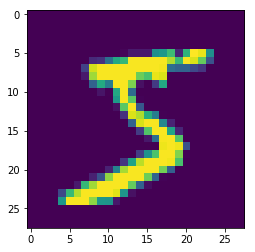

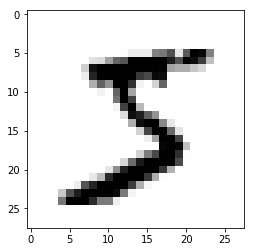

In [5]:
import matplotlib.pyplot as plt#check the Graph,how data looks like
plt.imshow(x_train[0])
plt.show()#To execute the graph
plt.imshow(x_train[0], cmap = plt.cm.binary)

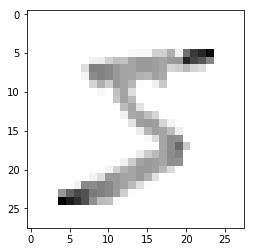

In [6]:
x_train = tf.keras.utils.normalize (x_train,axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)
plt.imshow(x_train[0], cmap= plt.cm.binary)

In [21]:
print(x_train[0])# x-train cantains data

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [7]:
print(y_train[0])#y_train lable

5


In [8]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE, IMG_SIZE,1)
#increasing one dimension for kenal operation
#Resizing image to make it suitable for apply convolution operation
x_testr=np.array(x_test).reshape(-1,IMG_SIZE, IMG_SIZE,1)
print ("Training sample dimension",x_trainr.shape)
print ("Testing sample dimension",x_testr.shape)

Training sample dimension (60000, 28, 28, 1)
Testing sample dimension (10000, 28, 28, 1)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D ,MaxPooling2D

In [10]:
model = Sequential()
#creating a Deep neural network
##First convolution layer
model.add(Conv2D(64, (3,3),input_shape = x_trainr.shape[1:]))
#only for First convolation layer to mention input layer size
model.add(Activation("relu"))#activation function to make it non-linear,<0,remove,>0
model.add(MaxPooling2D(pool_size=(2,2)))#Maxpooling allow single maximam value of 2x2,drop

#2nd convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd convolution layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fully connected layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))# last dense layer 
model.add(Activation('softmax'))

In [11]:
model.compile(loss ="sparse_categorical_crossentropy",optimizer ="adam", metrics=['accuracy'])
model.fit(x_trainr,y_train,epochs=5, validation_split = 0.3)# training the model

Epoch 1/5
1313/1313 [==============================] - 79s 59ms/step - loss: 0.6898 - accuracy: 0.7688 - val_loss: 0.1222 - val_accuracy: 0.9637
Epoch 2/5
1313/1313 [==============================] - 75s 57ms/step - loss: 0.1148 - accuracy: 0.9660 - val_loss: 0.1106 - val_accuracy: 0.9659
Epoch 3/5
1313/1313 [==============================] - 75s 57ms/step - loss: 0.0826 - accuracy: 0.9740 - val_loss: 0.0741 - val_accuracy: 0.9767
Epoch 4/5
1313/1313 [==============================] - 77s 59ms/step - loss: 0.0570 - accuracy: 0.9818 - val_loss: 0.0712 - val_accuracy: 0.9784
Epoch 5/5
1313/1313 [==============================] - 84s 64ms/step - loss: 0.0483 - accuracy: 0.9847 - val_loss: 0.0754 - val_accuracy: 0.9769


In [12]:
test_loss,test_acc = model.evaluate(x_testr,y_test)
#Evaluation on testing data set MNIST
print("Test Loss on 10,000 test smaples",test_loss)
print("validation Accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.0684 - accuracy: 0.9805
Test Loss on 10,000 test smaples 0.06838575750589371
validation Accuracy on 10,000 test samples 0.9804999828338623


In [13]:
predicions = model.predict([x_testr])
print(np.argmax(predicions[128]))# argmax will return the maximum value index and find the value of it

8


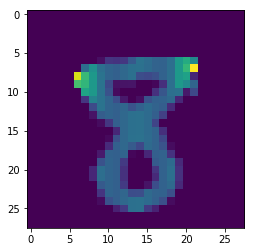

In [14]:
plt.imshow(x_test[128])

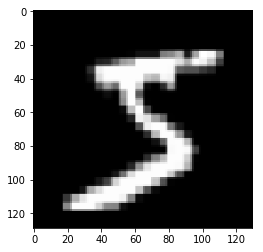

In [15]:
import cv2
img = cv2.imread('five.png')
plt.imshow(img)

In [16]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)# To convert to gray
resized = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)
resized.shape

(28, 28)

In [17]:
newimg = tf.keras.utils.normalize (resized, axis = 1)# 0 to 1 scaling
newimg= np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)#keral operation of convoution layer
newimg.shape

(1, 28, 28, 1)

In [18]:
predicions = model.predict(newimg)
print(np.argmax(predicions))

5
